# PROJECT
Bigmart Sales Analysis

In [34]:
import pandas as pd
from pathlib import Path
fname = Path(r"C:\Users\euzoe\OneDrive\Desktop\DATA_ANALYSIS\DATASETS\Bigmart.csv")
fname.is_file()

True

In [35]:
df = pd.read_csv(fname)
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [36]:
df.shape

(8523, 12)

In [37]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# DATA CLEANING

In [38]:
d=df[['Item_Weight', 'Outlet_Size']] #columns with missing values

In [39]:
d.isnull().sum() #columns with missing values

Item_Weight    1463
Outlet_Size    2410
dtype: int64

# Deal with the missing value
replace the missing value with the mean of the column

In [40]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Drop the whole row using dropna. used basically for column with missing strings
or 
Replace with the mode value

In [42]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df["Outlet_Size"].isnull().sum()

0

In [43]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Question 1
Does the Outlet_Type have any impact on the overall sales?

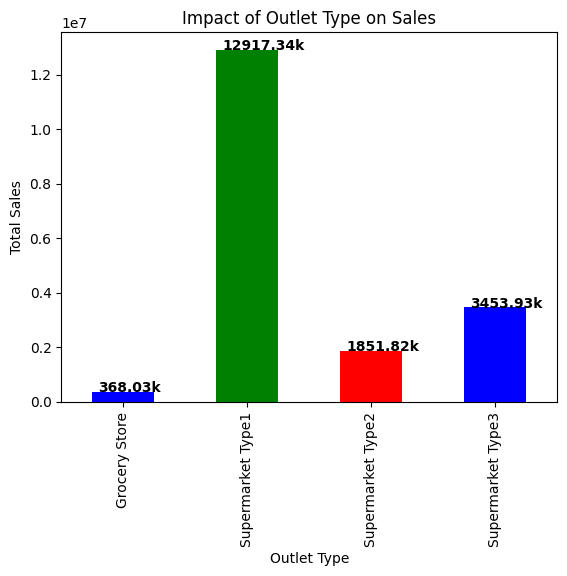

In [44]:
# group data by Outlet_Type and calculate the total sales for each group

import matplotlib.pyplot as plt
sales_by_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# plot the bar chart
sales_by_outlet.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.title('Impact of Outlet Type on Sales')

# Add the values on top of the bars
for i, v in enumerate(sales_by_outlet):
    plt.text(i-.2, v+.01, str(round(v/1000,2))+'k', color='black', fontweight='bold')

# Show the chart
plt.show()


# Question 2
Which outlet_location_type has the most overall sales? 

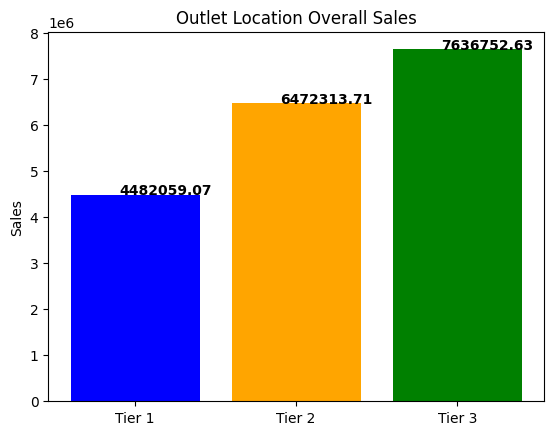

In [45]:
import matplotlib.pyplot as plt

# Create a bar chart
outlet_location_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
colors = ['blue', 'orange', 'green']

plt.bar(outlet_location_sales.index, outlet_location_sales.values, color = colors)
plt.ylabel('Sales')
plt.title("Outlet Location Overall Sales")

# Add the values on top of the bars
for i, v in enumerate(outlet_location_sales.values):
    plt.text(i-.1, v+.01, str(round(v,2)), color='black', fontweight='bold')

# Show the chart
plt.show()


# Question 3
which location had the maximum sales

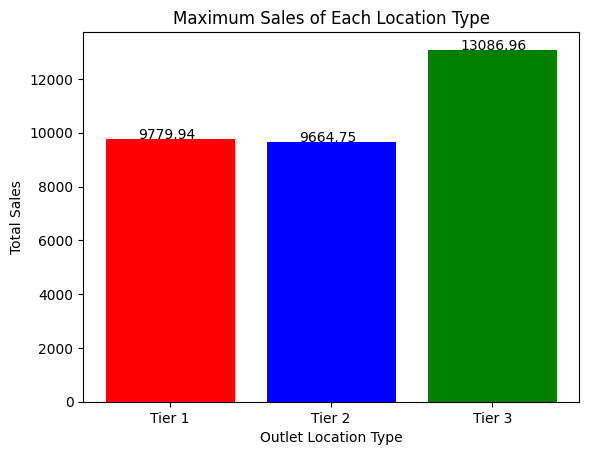

In [46]:
import matplotlib.pyplot as plt

# Group data by 'Outlet_Location_Type' and sum 'Item_Outlet_Sales'
outlet_location_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].max()

# Plot bar chart
plt.bar(outlet_location_sales.index, outlet_location_sales.values, color=['red', 'blue', 'green','purple'])
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Maximum Sales of Each Location Type')

# Add the values on top of the bars
for i, v in enumerate(outlet_location_sales.values):
    plt.text(i-.2, v+.01, str(round(v,2)))

# Show the chart
plt.show()


# Question 4
 Does the outlet size have any impact on the overall sales.

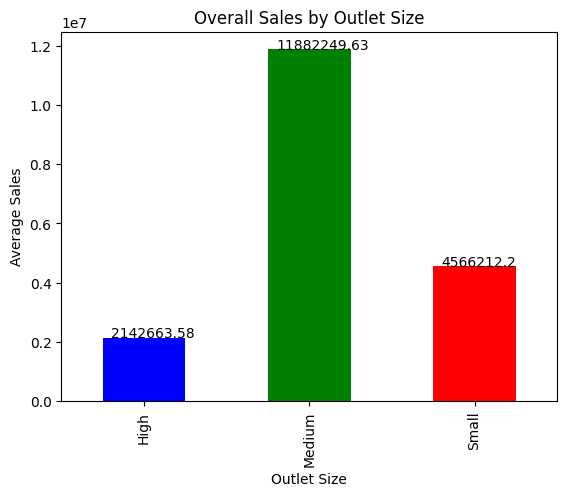

In [47]:
import matplotlib.pyplot as plt

# group data by Outlet_Size and calculate the average sales for each group
sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

# plot the bar chart
sales_by_size.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.title('Overall Sales by Outlet Size')

# Add the value on top of the bar
for i, v in enumerate(sales_by_size):
    plt.text(i-.2, v+.01, str(round(v,2)))

# Show the chart
plt.show()


# Question 5
Which category of products sells the most?

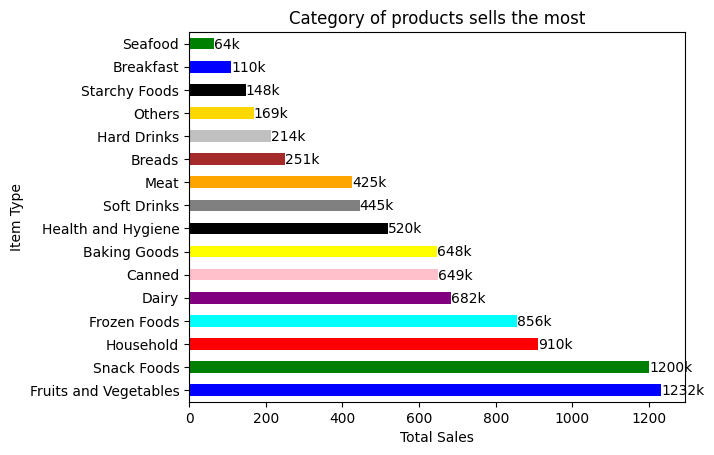

In [48]:
import matplotlib.pyplot as plt

# group data by Item_type and calculate the total sales for each group
sales_by_item = df.groupby('Item_Type')['Item_Outlet_Sales'].count().sort_values(ascending=False)

# plot the bar chart
sales_by_item.plot(kind='barh', color=['blue', 'green', 'red','cyan','purple','pink','yellow','black','gray','orange','brown','silver','gold','black'])
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.title('Category of products sells the most')

# Add the value on top of the bar
for i, v in enumerate(sales_by_item):
    plt.text(v+.01, i-.2, str(round(v,2))+'k')

# Show the chart
plt.show()


# Question 6
Do the product visibility and weight have any impact on the sales of the product?

Create scatter plot of Item_Visibility vs Item_Outlet_Sales

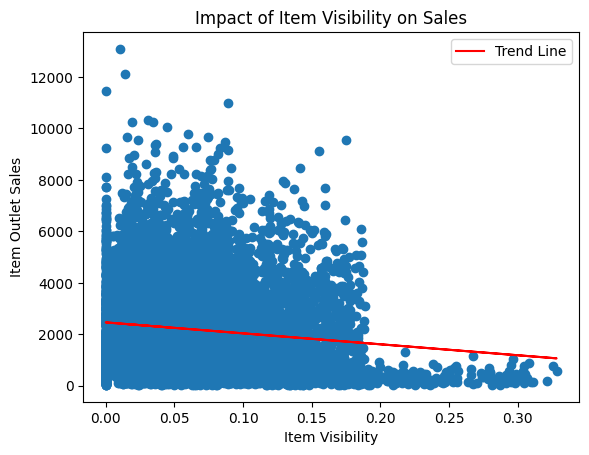

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Item Visibility on Sales')

#Add trend line
slope, intercept, r_value, p_value, std_err = linregress(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.plot(df['Item_Visibility'], slope*df['Item_Visibility']+intercept, color='red', label='Trend Line')
plt.legend()

plt.show()

Create scatter plot of Item_Weight vs Item_Outlet_Sales

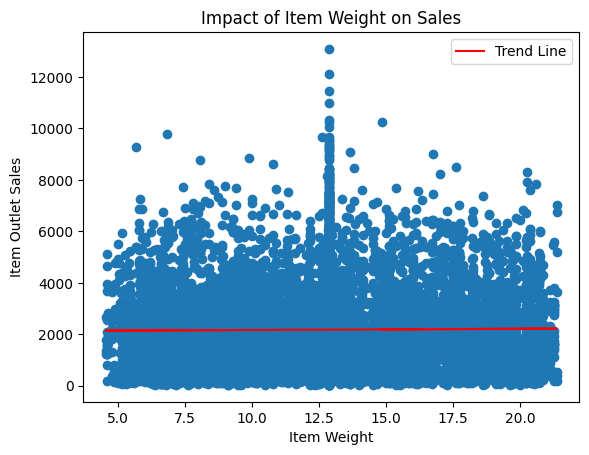

In [50]:
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Item Weight on Sales')

#Add trend line
slope, intercept, r_value, p_value, std_err = linregress(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.plot(df['Item_Weight'], slope*df['Item_Weight']+intercept, color='red', label='Trend Line')
plt.legend()

plt.show()

# Question 7
What is the average MRP of the product that sells the most and the least? Which category do these products fall under?

In [51]:
import pandas as pd

# group data by Item_Type and calculate the average MRP for each group
mrp_by_item = df.groupby('Item_Type')['Item_MRP'].mean()

# find the Item_Type with the maximum average MRP
max_mrp_item = mrp_by_item.idxmax()
print("The Item_Type with the highest average MRP is:", max_mrp_item)

# find the Item_Type with the minimum average MRP
min_mrp_item = mrp_by_item.idxmin()
print("The Item_Type with the lowest average MRP is:", min_mrp_item)


The Item_Type with the highest average MRP is: Household
The Item_Type with the lowest average MRP is: Baking Goods
